<a href="https://colab.research.google.com/github/fatenmegahed/npro/blob/main/california_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('/content/sample_data/california_housing_train.csv')
df_test = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [4]:
df=pd.concat([df_train,df_test])


In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20000 non-null  float64
 1   latitude            20000 non-null  float64
 2   housing_median_age  20000 non-null  float64
 3   total_rooms         20000 non-null  float64
 4   total_bedrooms      20000 non-null  float64
 5   population          20000 non-null  float64
 6   households          20000 non-null  float64
 7   median_income       20000 non-null  float64
 8   median_house_value  20000 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


In [14]:
total_population=df['population'].sum()
total_population

np.float64(28511153.0)

In [17]:
df['population'].mean()

np.float64(1425.55765)

In [10]:
total_households=df['households'].sum()
total_households

np.float64(9990509.0)

In [19]:
housing_median_age=df['housing_median_age'].mean()
housing_median_age

np.float64(28.62775)

<Axes: >

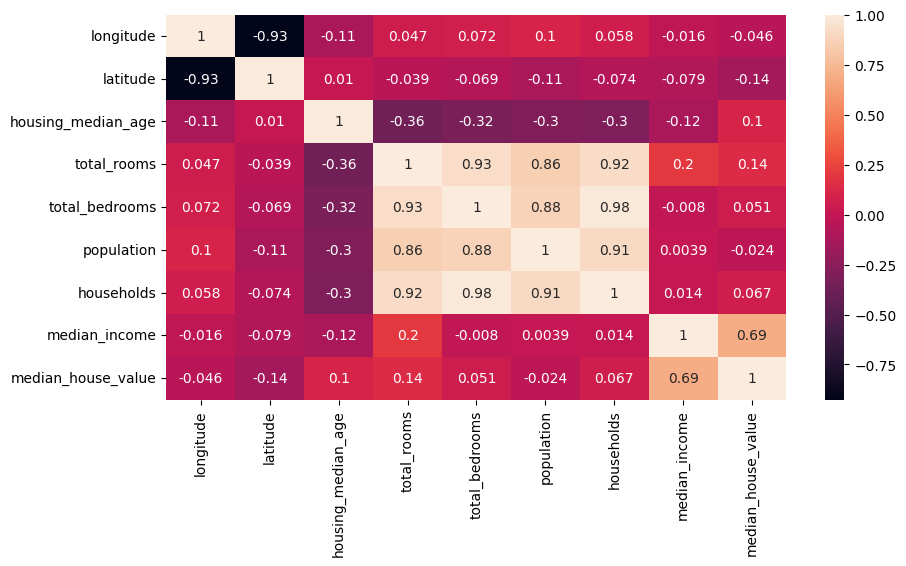

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

(array([ 698., 1078., 2162., 2598., 2420., 2279., 3456., 1844., 1571.,
        1894.]),
 array([ 1. ,  6.1, 11.2, 16.3, 21.4, 26.5, 31.6, 36.7, 41.8, 46.9, 52. ]),
 <BarContainer object of 10 artists>)

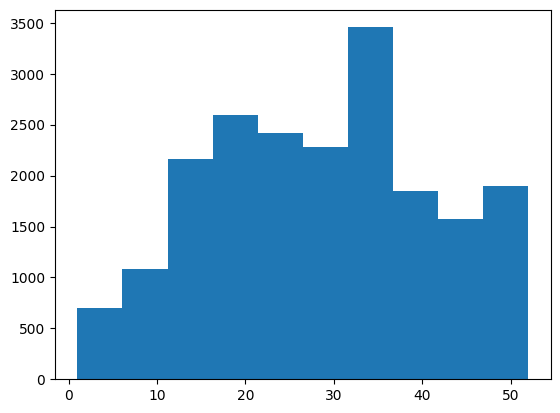

In [23]:
plt.hist(df['housing_median_age'])

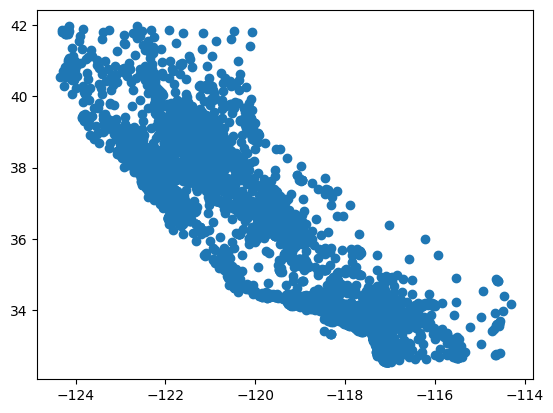

In [24]:
plt.scatter(df['longitude'],df['latitude'])

In [35]:
x=df[['longitude','latitude','total_rooms','total_bedrooms','housing_median_age','population','households','median_income']]
y=df['median_house_value']

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
accuracy_score=lr.score(x_test,y_test)
print(accuracy_score)


0.6453345727255255


In [39]:
prediction=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
prediction.head()

,Actual,Predicted
10650,71900.0,3922.498207
2041,186900.0,212669.019286
8668,311000.0,278550.273090
1114,120800.0,70131.555173
13902,358800.0,304498.616416


In [51]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score=rf.score(x_test,y_test)
print(accuracy_score)
mse=mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(mse)
print(rmse)
r2=rf.score(x_test,y_test)
print(r2)

0.8286522646898175
2352702101.434169
48504.6606155962
0.8286522646898175


In [41]:
prediction=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
prediction.head()

,Actual,Predicted
10650,71900.0,88846.00
2041,186900.0,199270.00
8668,311000.0,279522.00
1114,120800.0,105010.00
13902,358800.0,337735.07


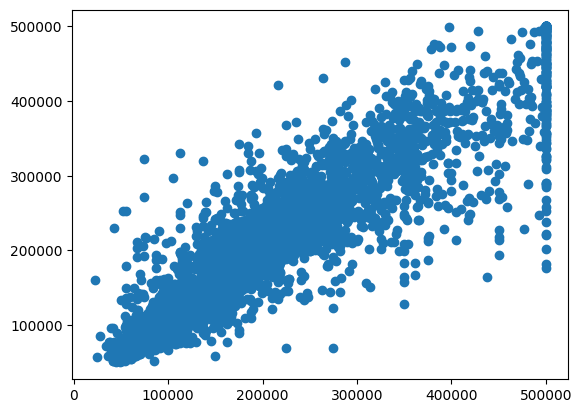

In [49]:
plt.scatter(y_test,y_pred)


/tmp/ipython-input-693362334.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


([0, 1], [Text(0, 0, 'Linear Regression'), Text(1, 0, 'Random Forest')])

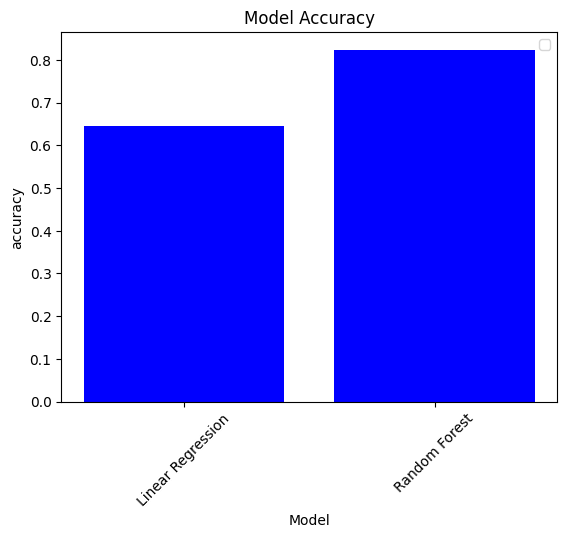

In [54]:
Model=['Linear Regression','Random Forest']
accuracy_scores=[.645,.824]
plt.bar(Model,accuracy_scores,color='blue')
plt.xlabel('Model')
plt.ylabel('accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.xticks(rotation=45)